In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error








In [2]:
# Loading the dataset
file_path = 'cleaned_green_tripdata_2025_03.csv'
df = pd.read_csv(file_path, encoding='ascii')

C:\Users\sivakumar\AppData\Local\Temp\ipykernel_23864\1866842288.py:3: DtypeWarning: Columns (2,5,14,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, encoding='ascii')


In [3]:




# Displaying the first few rows of the dataframe
print(df.head())

   VendorID store_and_fwd_flag RatecodeID  PULocationID  DOLocationID  \
0         2                  N          1            75           239   
1         2                  N          1            41            42   
2         2                  N          1            66            33   
3         2                  N          1           134           122   
4         2                  N          1           260           260   

  passenger_count  trip_distance  fare_amount  extra  mta_tax  ...  \
0               1           2.20         18.4    1.0      0.5  ...   
1               1           1.06          8.6    1.0      0.5  ...   
2               1           0.82          5.8    1.0      0.5  ...   
3               1           4.94         21.9    1.0      0.5  ...   
4               1           0.81          8.6    1.0      0.5  ...   

   payment_type  trip_type  congestion_surcharge  cbd_congestion_fee  \
0             1          1                  2.75                 0.0

In [4]:
# Selecting relevant features and target variable
features = ['trip_distance', 'pickup_hour', 'is_weekend', 'is_rush_hour']
target = 'trip_duration'

In [5]:
# Preparing the feature matrix and target vector
X = df[features]
Y = df[target]

In [6]:
# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [7]:
# Displaying the shapes of the training and testing sets
print('Training set shape:', X_train.shape)
print('Testing set shape:', X_test.shape)

Training set shape: (33392, 4)
Testing set shape: (8348, 4)


In [8]:
# Initializing the Linear Regression model
model = LinearRegression()



In [9]:
# Training the model on the training data
model.fit(X_train, Y_train)



LinearRegression()

In [10]:
# Making predictions on the test set
Y_pred = model.predict(X_test)



In [11]:
# Evaluating the model's performance
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)



In [12]:
# Displaying the evaluation metrics
print('Mean Squared Error:', mse)
print('R-squared:', r2)

Mean Squared Error: 78110.11368697614
R-squared: 0.42731394350803753


In [13]:
print('Mean Absolute Error: ',mean_absolute_error(Y_test,Y_pred))
print('Mean Squared Error: ',mean_squared_error(Y_test,Y_pred))
print('Root Mean Squared Error: ',np.sqrt(mse))
print('R-Squared Error: ',r2_score(Y_test, Y_pred))
print('Mean Absolute Percentage Error: ',np.mean(np.abs((Y_test/Y_pred)/Y_test))*100)

Mean Absolute Error:  199.67356191885779
Mean Squared Error:  78110.11368697614
Root Mean Squared Error:  279.4818664725426
R-Squared Error:  0.42731394350803753
Mean Absolute Percentage Error:  0.16300317695949235


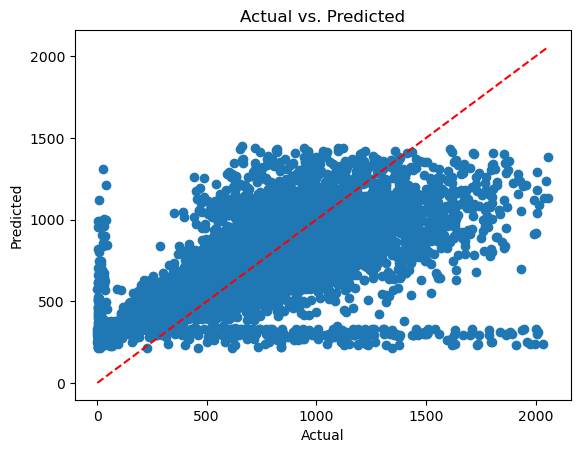

In [17]:
#Scatter plot with Regression Line

plt.scatter(Y_test, Y_pred)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()],'r--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.show()

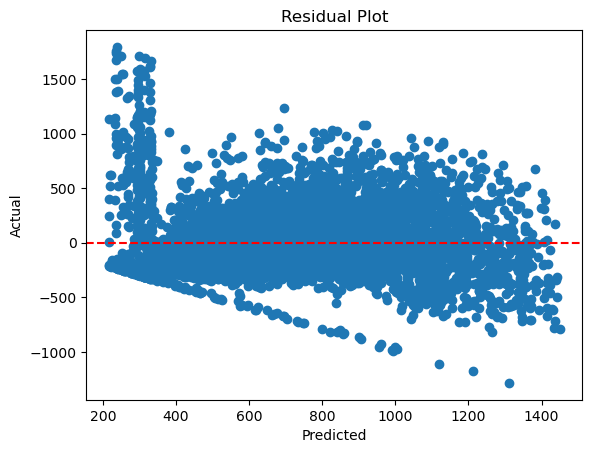

In [15]:
#Residual Plot

residuals=Y_test-Y_pred
plt.scatter(Y_pred,residuals)
plt.axhline(0,color='red',linestyle='--')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Residual Plot')
plt.show()

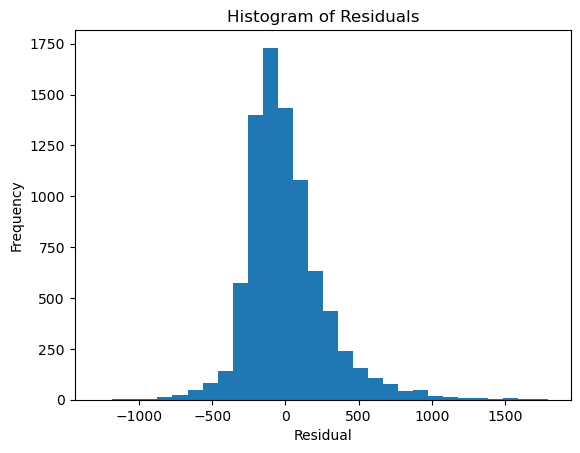

In [16]:
#Histogram of residual plot

plt.hist(residuals, bins=30)
plt.title('Histogram of Residuals')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.show()